# 1.작업형 1유형 (3문항)
- 데이터 탐색
- 데이터 전처리 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# 데이터 불러오고 기본정보 확인
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

<Axes: xlabel='Sex', ylabel='count'>

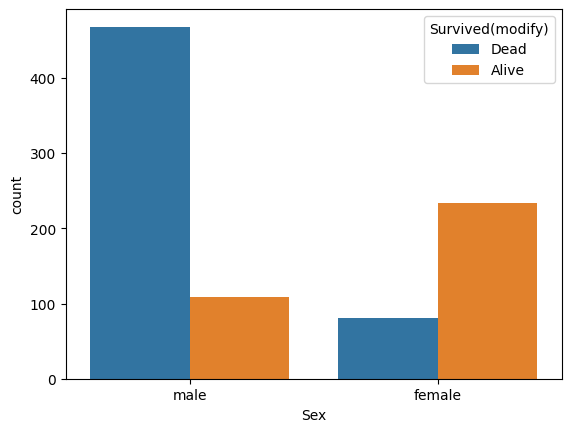

In [55]:
# 데이터 시각화 
df['Survived'].value_counts() # 생존 , 사망 수 확인 
# 생존 = 1 , 사망 =0 을 범주형 변수로 변환  
df['Survived(modify)'] = df['Survived'].replace([0,1],['Dead','Alive'])
sns.countplot(data=df, x='Sex', hue='Survived(modify)')


In [56]:
# 데이터 전처리 
df.isna().sum() # 각 컬럼 결측치 개수 확인 
# df.info() 로도 가능 
# Age , Cabin, Embark에 각 결측치가 존재


PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Survived(modify)      0
dtype: int64

In [57]:
# Age , Cabin은 결측치가 많으니 삭제 
df_dropna = df.copy()
df_dropna= df_dropna.drop(columns=['Age', 'Cabin'])
df_dropna.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            2
Survived(modify)    0
dtype: int64

In [58]:
# 결측치가 2개밖에 없는 Embarked 는 결측치가 있는 행 제거 
df_dropna2 = df_dropna.dropna()
df_dropna2.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Survived(modify)    0
dtype: int64

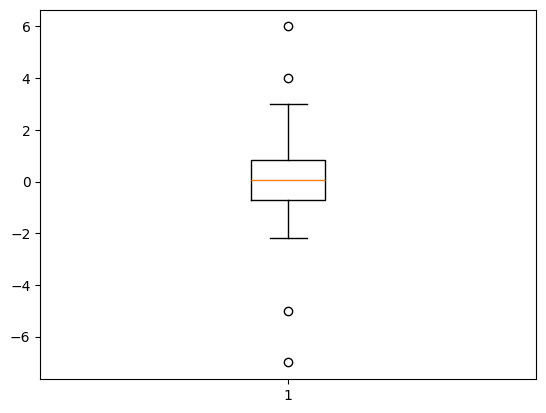

IQR: 1.5290591862838374
[ 4.  6. -7. -5.]


In [59]:
# 이상치 처리 
data = np.random.randn(50)
data= np.concatenate((data, np.array([4,6,-7,-5]))) # 정규분포를 따르는 50개 표본에 4개 이상치를 추가

# 이상치 검출 boxplot
plt.boxplot(data)
plt.show()

# 이상치만 출력

Q1,Q3 = np.percentile(data,[25,75])
IQR = Q3-Q1
print('IQR:',IQR)

outlier = data[(Q1-1.5*IQR>data) | (Q3 +1.5*IQR<data)]
print(outlier)



In [60]:
# 중복값 처리 
df = pd.DataFrame({'group':['A','B','C','B','B','C','A','C','A','B'], 'test_1':np.random.randn(10),'test_2':np.random.randn(10)})
print(df)

df.loc[[1,4],['test_1','test_2']] =0.5
print(df)# 중복값 데이터  

print(df[df.duplicated()])# 중복 데이터 위치 확인 
df.drop_duplicates(inplace=True) # 중복값 데이터 행 전체 제거 

print(df)


  group    test_1    test_2
0     A -2.720658 -1.204181
1     B  0.898233  0.669140
2     C -0.106295 -0.203630
3     B -0.285036 -0.097769
4     B -0.185651  0.436298
5     C -1.148047 -1.574791
6     A  0.443034 -0.272893
7     C -1.298059  0.903482
8     A -2.071952  0.140062
9     B  0.732238 -0.977259
  group    test_1    test_2
0     A -2.720658 -1.204181
1     B  0.500000  0.500000
2     C -0.106295 -0.203630
3     B -0.285036 -0.097769
4     B  0.500000  0.500000
5     C -1.148047 -1.574791
6     A  0.443034 -0.272893
7     C -1.298059  0.903482
8     A -2.071952  0.140062
9     B  0.732238 -0.977259
  group  test_1  test_2
4     B     0.5     0.5
  group    test_1    test_2
0     A -2.720658 -1.204181
1     B  0.500000  0.500000
2     C -0.106295 -0.203630
3     B -0.285036 -0.097769
5     C -1.148047 -1.574791
6     A  0.443034 -0.272893
7     C -1.298059  0.903482
8     A -2.071952  0.140062
9     B  0.732238 -0.977259


In [61]:
from sklearn.preprocessing import LabelEncoder
# 데이터 변환 (라벨인코더)
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')
le = LabelEncoder()
# species 행에 해당하는 데이터들을 연속형 변수(라벨인코더)로 변환하시오
df['species'] = le.fit_transform(df['species'])

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [62]:
# 원-핫 인코더 사용 

df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')
df_iris = pd.get_dummies(df_iris, columns=['species'], drop_first=True)

print(df_iris)


     sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0             5.1          3.5           1.4          0.2               False   
1             4.9          3.0           1.4          0.2               False   
2             4.7          3.2           1.3          0.2               False   
3             4.6          3.1           1.5          0.2               False   
4             5.0          3.6           1.4          0.2               False   
..            ...          ...           ...          ...                 ...   
145           6.7          3.0           5.2          2.3               False   
146           6.3          2.5           5.0          1.9               False   
147           6.5          3.0           5.2          2.0               False   
148           6.2          3.4           5.4          2.3               False   
149           5.9          3.0           5.1          1.8               False   

     species_virginica  
0 

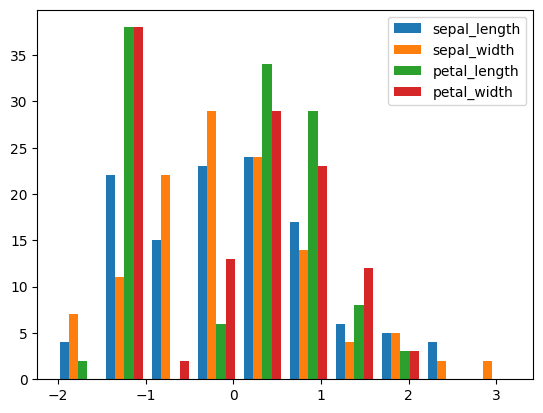

In [63]:
# 데이터 표준화 (standard scaler 정규분포화 )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')

# 데이터 분할
target = 'species'
x = df_iris.drop(columns=target)
y = df_iris[target]
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,stratify=y)

# 데이터 표준화 
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
plt.hist(train_x)
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])



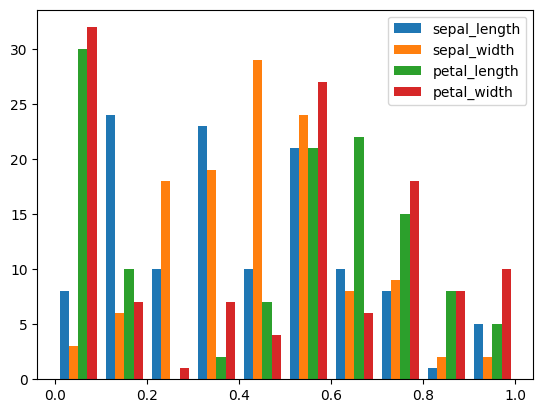

In [64]:
# 데이터 표준화 (Minmax Scaler 최대 최소분포화 )
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')

# 데이터 분할
target = 'species'
x = df_iris.drop(columns=target)
y = df_iris[target]
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,stratify=y)

# 데이터 표준화 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
plt.hist(train_x)
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])



In [65]:
# 데이터 평활화  

# 시계열 데이터를 받아온다면 시행해보자 

# 2. 작업형 2유형 (1문항)
- 데이터 분석 절차
- 데이터 분석 모델 설계계

In [66]:
# 데이터 불러오고 기본정보 확인
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [67]:
# 데이터 전처리 (불필요한 컬럼 제거, 결측값 대체, 라벨 인코딩)
df = df.drop(columns=['PassengerId','Cabin','Name','Ticket'])
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


C:\Users\yee77\AppData\Local\Temp\ipykernel_17404\357190917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
C:\Users\yee77\AppData\Local\Temp\ipykernel_17404\357190917.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [68]:
# 데이터 분할
target = ['Survived']
x = df.drop(columns=target)
y = df[target]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y)
print(x)
print(y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  24.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [69]:
# 데이터 분석 (분류 문제)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # 서포트 벡터머신 classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# 랜덤포레스트 모델 
rfc =RandomForestClassifier(n_estimators= 120, max_depth=20, random_state=2024)
rfc.fit(x_train,y_train)

# 로지스틱 회귀 모델 로드 
# lr = LogisticRegression()

# K-NN 모델 로드 
# knn = KNeighborsClassifier()

# 서포트 벡터 머신 (분류)
# svc = SVC(kernel='rbf')

# 의사결정나무 모델 로드 
# dtc = DecisionTreeClassifier()

y_pred = rfc.predict(x_test)


# 모델 성능평가 
score = accuracy_score(y_test,y_pred)
print('accuracy_score:',score)
F1_score = f1_score(y_test, y_pred , average='micro')
print('f1_score:',F1_score)
# 혼동행렬 출력 
print(confusion_matrix(y_test,y_pred))


accuracy_score: 0.8156424581005587
f1_score: 0.8156424581005587
[[99 11]
 [22 47]]


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [70]:
# 데이터 분석 (회귀) 문제
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.svm import SVR # SVM Regressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 평가지표 
from sklearn.metrics import mean_absolute_error , mean_squared_error # MAE , MSE 
# 시각화 라이브러리 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 데이터 탐색
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/advertising.csv')
# print(df.info())
# print(df.head())

# 상관관계 분석
corr =df.corr(method='pearson') # 피어슨 상관분석 
print(corr)
print()
# 단순 선형 회귀 모델 로드 
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)
print()

# SVM (회귀) 모델 로드 
svr =SVR(kernel='poly') # kernel: 커널함수 선택('linear','sigmoid','rbf','poly')
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)
print()

# 의사결정나무 (회귀) 모델 로드
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)

# # 모델 성능 평가 
# r2 = r2_score(y_test, y_pred)
# print('r2:',r2)
# mae = mean_absolute_error(y_test,y_pred)
# print('mae:',mae)
# mse = mean_squared_error(y_test,y_pred)
# print('mse:',mse)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

r2: 0.34899230302242945
mae: 0.29461034723012525
mse: 0.15421330233325306

r2: -0.18840921179992565
mae: 0.389972873045866
mse: 0.28151511867798873

r2: 0.16662869638413125
mae: 0.20344506517690877
mse: 0.1974123215394165


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


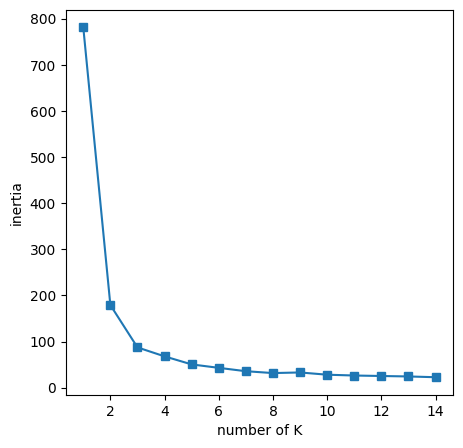

In [71]:
# 비지도학습 (군집분석)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
df =pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/iris.csv')
print(df.info())
print(df.head())

# 데이터 전처리(라벨링)

le =LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# K-means 클러스터링 모델 
cluster = KMeans(n_clusters=3, n_init=10, max_iter=500,random_state=2024,algorithm='lloyd')

cluster.fit(df)
y_pred = cluster.predict(df)

# 군집분석 성능평가 및 시각화 

scope= range(1,15)
inertias=[]

for i in scope: # K-means 의 클러스터 개수 별 성능을 평가하기 위한 지표표
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertias.append(model.inertia_) # inertia 가 무슨 의미일까??

plt.figure(figsize=(5,5))
plt.plot(scope, inertias,'-s')
plt.xlabel('number of K')
plt.ylabel('inertia')
plt.show()



In [72]:
# A-priori 알고리즘 연관성 분석 
from mlxtend.preprocessing import TransactionEncoder# 일반적인 데이터를 배열 형식으로 변환(원 핫 인코딩 형식으로 변환)
from mlxtend.frequent_patterns import apriori , association_rules # 연관성분석 

data = [['Coffee','Beer','Cheese','Milk','Book'],
        ['Beer','Cheese','Milk','Book'],
        ['Coffee','Banana','Milk'],
        ['Coffee','Apple','Cup','Book'],
        ['Cup','Beer','Chair','Diaper','Milk']
]

te = TransactionEncoder()
te_arr = te.fit(data).transform(data)

df = pd.DataFrame(te_arr, columns=te.columns_)
print(df) # 원-핫 인코딩된 numpy 배열 생성 

# A-priori 알고리즘 적용
frequent_items = apriori(df,min_support=0.5, use_colnames=True) # 최소 지지도 : 0.5 , 반환된 데이터프레임의 열 인덱스(False) 대신 이름을 사용(True)
print(frequent_items)

# 연관성분석 결과 확인 
result = association_rules(frequent_items, metric='confidence',min_threshold=0.6,num_itemsets=5) # 최소 신뢰도 0.6, 총 거래건수 (행)은 5개 이므로 num_itemsets = 5
display(result)
# 우유와 맥주의 신뢰도는 1.0 , 지지도는 0.6 ,향상도는 1.25로 높은 연관성이 있음을 확인할 수 있다 

   Apple  Banana   Beer   Book  Chair  Cheese  Coffee    Cup  Diaper   Milk
0  False   False   True   True  False    True    True  False   False   True
1  False   False   True   True  False    True   False  False   False   True
2  False    True  False  False  False   False    True  False   False   True
3   True   False  False   True  False   False    True   True   False  False
4  False   False   True  False   True   False   False   True    True   True
   support      itemsets
0      0.6        (Beer)
1      0.6        (Book)
2      0.6      (Coffee)
3      0.8        (Milk)
4      0.6  (Beer, Milk)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Beer),(Milk),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
1,(Milk),(Beer),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875


# 3. 작업형 3유형 (6문항)
- 가설검정

In [73]:
purchase= pd.DataFrame({'purchase':[540,370,310,120]},
                       index=['laptop','TV','air_conditioner','refrigerator'])

non_purchase = pd.DataFrame({'non_purchase':[160,230,490,380]},
                       index=['laptop','TV','air_conditioner','refrigerator'])

df = pd.concat([purchase,non_purchase],axis=1) # 열 방향으로 합치기 
print(df)

# 카이제곱 동질성 검정 
from scipy.stats import chi2_contingency

chi2,p_val,dof,exp = chi2_contingency(df)
print('Chi2:',chi2) # 카이제곱 통계량
print('p_value:',p_val) # p-value

                 purchase  non_purchase
laptop                540           160
TV                    370           230
air_conditioner       310           490
refrigerator          120           380
Chi2: 412.5814521496824
p_value: 4.1669638825802086e-89


In [74]:
# 데이터 생성 
real_data = [90,72,43,52,88]
exp = int( sum(real_data) / len(real_data))
print('기대빈도: ',exp)

expected = [69,69,69,69,69]

# 카이제곱 적합도 검정 
from scipy.stats import chisquare
chi , p_val =chisquare(real_data, expected) # real_data: 관측빈도 , expected: 기대빈도 

print('chi:', chi)
print('p_value:',p_val)


기대빈도:  69
chi: 25.73913043478261
p_value: 3.57175522430071e-05


In [75]:
# 회귀분석( 회귀계수 및 각 회귀변수의 값 확인) logit 함수 사용 
from statsmodels.formula.api import logit

# 데이터로드 
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/wine_data.csv')
df= df.iloc[:130,:]
# 전체 데이터중 130행이 0~1사이 값을 가지므로 로지스틱 회귀분석을 위해 0~1사이 종속변수를 갖는 값들만 사용

df.rename(columns={'class':'type'}, inplace=True)
# 종속변수인 class 칼럼 명칭의 혼동을 피하기 위해 컬럼명을 type으로 바꿈 

# 로지스틱 회귀 분석 
from statsmodels.formula.api import logit

result = logit('type~alcohol + ash + magnesium + hue',data=df).fit().summary()

print(result)

Optimization terminated successfully.
         Current function value: 0.167288
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                  130
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:                  0.7572
Time:                        10:19:21   Log-Likelihood:                -21.747
converged:                       True   LL-Null:                       -89.554
Covariance Type:            nonrobust   LLR p-value:                 2.451e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.3888     13.192      5.260      0.000      43.532      95.245
alcohol       -4.8429      0.

In [76]:
# 회귀분석( 회귀계수 및 각 회귀변수의 값 확인) Logit 클래스 사용
from statsmodels.formula.api import logit

# 데이터로드 
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/wine_data.csv')
df= df.iloc[:130,:]
# 전체 데이터중 130행이 0~1사이 값을 가지므로 로지스틱 회귀분석을 위해 0~1사이 종속변수를 갖는 값들만 사용

df.rename(columns={'class':'type'}, inplace=True)
# 종속변수인 class 칼럼 명칭의 혼동을 피하기 위해 컬럼명을 type으로 바꿈 

# 로지스틱 회귀 분석 
import statsmodels.api as sm

X= df[['alcohol','ash','magnesium','hue']]
y= df['type']

X = sm.add_constant(X)

model = sm.Logit(y,X).fit()
result = model.summary()
print(result)



Optimization terminated successfully.
         Current function value: 0.167288
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                  130
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:                  0.7572
Time:                        10:19:21   Log-Likelihood:                -21.747
converged:                       True   LL-Null:                       -89.554
Covariance Type:            nonrobust   LLR p-value:                 2.451e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.3888     13.192      5.260      0.000      43.532      95.245
alcohol       -4.8429      0.

In [80]:
# 다중 선형 회귀분석

# 데이터로드
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/cardiovascular_heart_disease_data.csv')

#df.head()
#df.info()

# 다중 선형 회귀분석
import statsmodels.api as sm

X = sm.add_constant(df[['weight','cholesterol','smoke']])
model = sm.OLS(df['cardio'],X)
result = model.fit()

# 다중 선형 회귀 분석 결과 
print(result.summary())
print(round(result.params['cholesterol'],3))# 콜레스테롤 회귀계수 

                            OLS Regression Results                            
Dep. Variable:                 cardio   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1830.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:59:37   Log-Likelihood:                -48162.
No. Observations:               70000   AIC:                         9.633e+04
Df Residuals:                   69996   BIC:                         9.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0965      0.010     -9.810      